# **WiDSxSAP Case Competition 2024**

In [1]:
# Run (in terminal) if needed:
# pip install pandas matplotlib seaborn scikit-learn
# pip install tensorflow
# If using anaconda: conda install pandas matplotlib seaborn scikit-learn tensorflow

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

## **Exploratory Data Analysis**

In [4]:
# Load datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
# View the first few rows of the dataset
print(train.head())

   ID  Age  AI_Interaction_Level  Satisfaction_with_AI_Services  \
0   1   59                     2                              7   
1   2   49                     2                              6   
2   3   35                     2                              3   
3   4   63                     2                              3   
4   5   28                     4                              6   

   AI_Personalization_Effectiveness  AI_Response_Time  \
0                                 7                 2   
1                                 5                 1   
2                                 3                 3   
3                                 3                 2   
4                                 6                 1   

   Overall_Usage_Frequency  Customer_Service_Interactions  \
0                       18                              5   
1                        3                              2   
2                        8                              2   
3         

In [6]:
# Check the total & types
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                5000 non-null   int64
 1   Age                               5000 non-null   int64
 2   AI_Interaction_Level              5000 non-null   int64
 3   Satisfaction_with_AI_Services     5000 non-null   int64
 4   AI_Personalization_Effectiveness  5000 non-null   int64
 5   AI_Response_Time                  5000 non-null   int64
 6   Overall_Usage_Frequency           5000 non-null   int64
 7   Customer_Service_Interactions     5000 non-null   int64
 8   Change_in_Usage_Patterns          5000 non-null   int64
 9   Customer_Churn                    5000 non-null   int64
dtypes: int64(10)
memory usage: 390.8 KB
None


We will run summary statistics and clean the data provided.

In [7]:
# Summary statistics for numerical features
print(train.describe())

                ID          Age  AI_Interaction_Level  \
count  5000.000000  5000.000000           5000.000000   
mean   2500.500000    42.575000              2.468800   
std    1443.520003    12.554597              0.940853   
min       1.000000    21.000000              1.000000   
25%    1250.750000    32.000000              2.000000   
50%    2500.500000    43.000000              2.000000   
75%    3750.250000    53.000000              3.000000   
max    5000.000000    64.000000              4.000000   

       Satisfaction_with_AI_Services  AI_Personalization_Effectiveness  \
count                     5000.00000                       5000.000000   
mean                         5.51060                          5.525800   
std                          2.86446                          2.884129   
min                          1.00000                          1.000000   
25%                          3.00000                          3.000000   
50%                          5.00000      

In [8]:
# Count distinct values and mode for categorical features
categorical_features = ['AI_Response_Time', 'Customer_Churn'] 
for feature in categorical_features:
    print(f"\nValue counts for {feature}:")
    print(train[feature].value_counts())


Value counts for AI_Response_Time:
AI_Response_Time
1    1708
2    1676
3    1616
Name: count, dtype: int64

Value counts for Customer_Churn:
Customer_Churn
0    2909
1    2091
Name: count, dtype: int64


In [9]:
# Identify any missing values in the dataset
print(train.isnull().sum())

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64


The dataset is tidy, **equally distributed** between categories, and has **no null values**.

#### **Univariate Analysis**

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


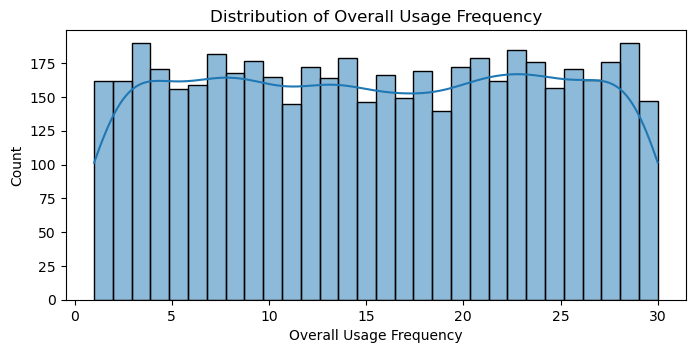

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


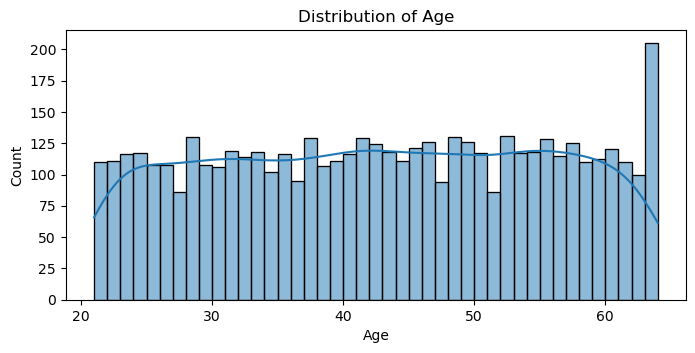

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


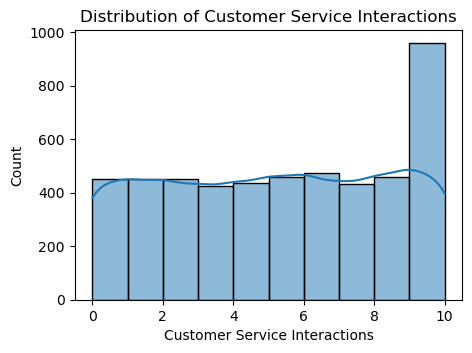

In [10]:
# Visualize the distribution of numerical features
plt.figure(figsize=(8, 3.5))
sns.histplot(data=train, x='Overall_Usage_Frequency', kde = True, bins=30)
plt.title('Distribution of Overall Usage Frequency')
plt.xlabel('Overall Usage Frequency')
plt.ylabel('Count')
plt.show()
    
plt.figure(figsize=(8, 3.5))
sns.histplot(data=train, x='Age', kde = True, binwidth=1)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
    
# Separate histogram for Customer_Service_Interactions
plt.figure(figsize=(5, 3.5))
sns.histplot(data=train, x='Customer_Service_Interactions', kde = True, binwidth=1)
plt.title('Distribution of Customer Service Interactions')
plt.xlabel('Customer Service Interactions')
plt.ylabel('Count')
plt.show()

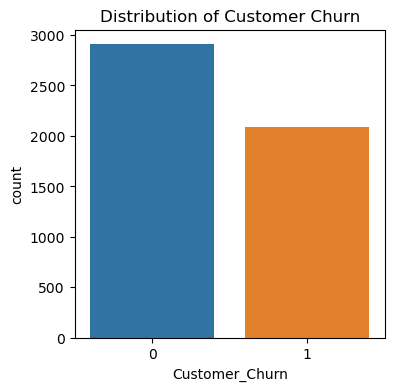

In [11]:
# Target variable
plt.figure(figsize=(4,4))
sns.countplot(x='Customer_Churn', data=train)
plt.title('Distribution of Customer Churn')
plt.show()

The data across different variables, both categorical and numerical, are distributed pretty evenly. However, as the target variable has more samples of positive customer churn, we will need to upsample our data during training.

#### **Correlation Analysis**

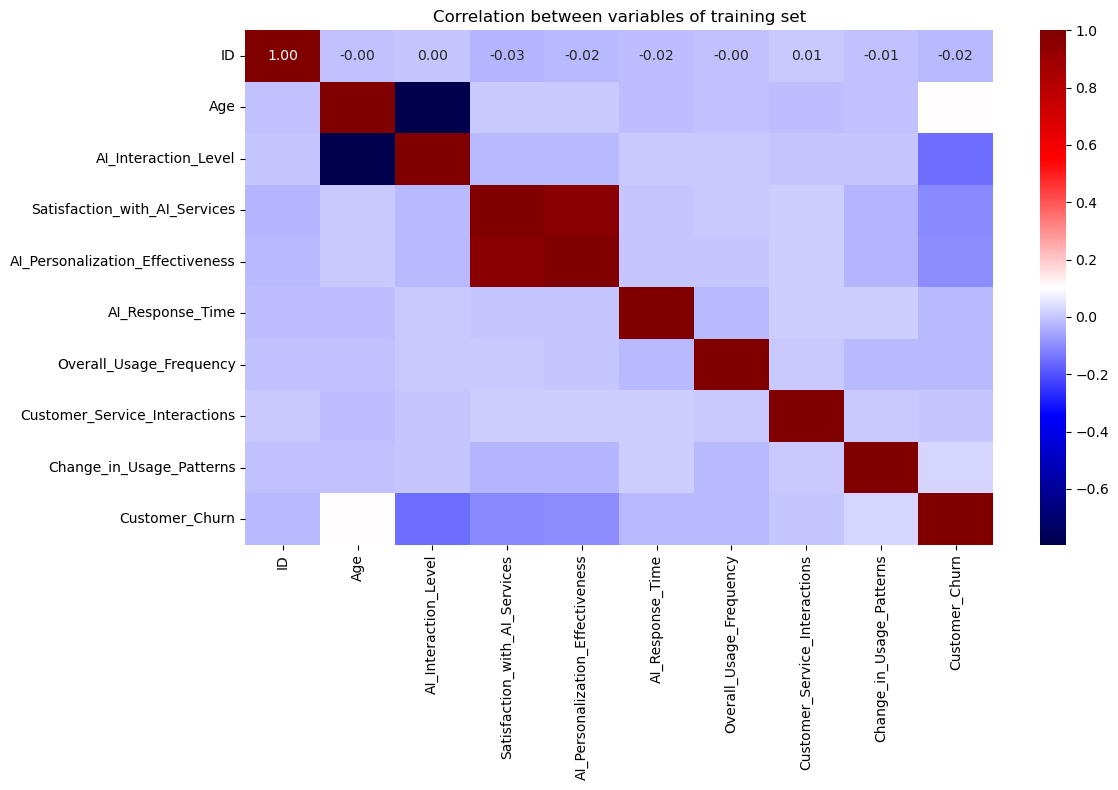

In [12]:
# Plotting correlation matrix
correlation_matrix = train.corr()

plt.figure(figsize=(12, 8))

# Drawing heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title("Correlation between variables of training set")

plt.tight_layout()
plt.show()

**Insights**
* AI interaction levels have a weak negative correlation (about 0.2) to customer churn.
* Similarly, weak negative relationships can be observed related to Satisfaction with AI services and AI Personalization Effectiveness. 
* Conversely, Age has a weak but noticable positive correlation to customer churn.

Satisfaction with AI services and AI Personalization Effectiveness correlates highly to one another (> 0.8). While these two variables naturally have a positive correlation with one another, keeping both as they are may cause some multicollinearity problems when working with models such as logistic regression. 

#### **Analysing Bivariate Feature Relationships**

We use box plots / histograms to visualize our **continuous** variables.

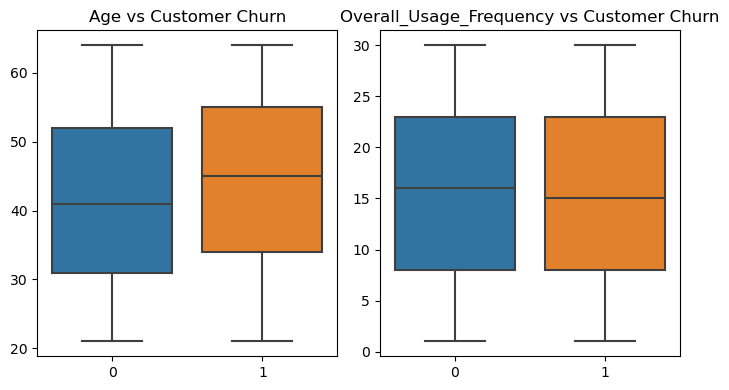

In [13]:
# List of continuous variables
continuous_vars = ['Age', 'Overall_Usage_Frequency']

fig, axes = plt.subplots(1, len(continuous_vars), figsize=(7, 4)) 

# Iterate through the variables and create a box plot for each
for ax, column in zip(axes, continuous_vars):
    sns.boxplot(ax=ax, x='Customer_Churn', y=column, data=train)
    ax.set_title(f'{column} vs Customer Churn')
    ax.set_xlabel('')  
    ax.set_ylabel('')  

plt.tight_layout()

# Show the plot
plt.show()

/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roselinakeziarijadi/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/seaborn

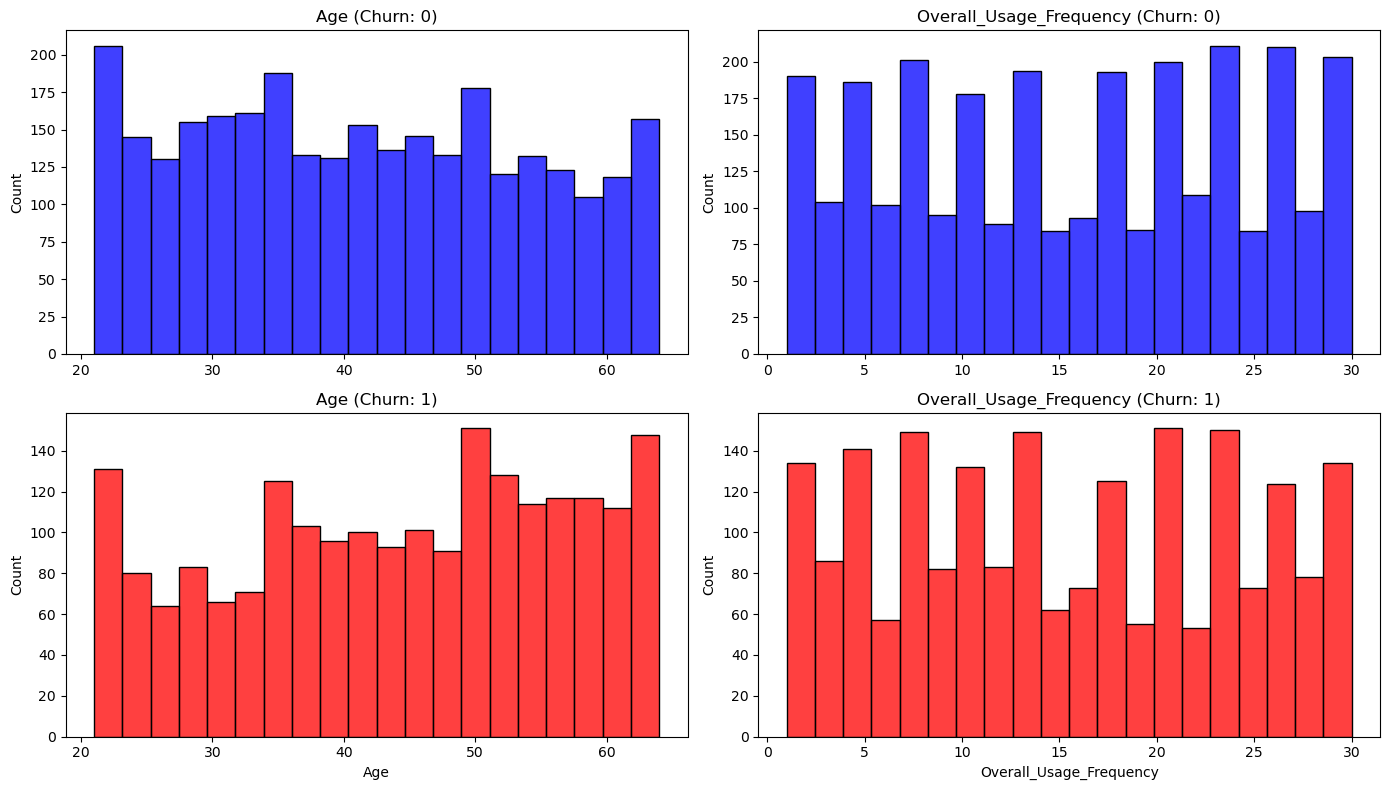

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(2, len(continuous_vars), figsize=(14, 8)) 

# Create a histogram for each churn category
for i, column in enumerate(continuous_vars):
    # Histogram for Customer Churn = 0
    sns.histplot(train[train['Customer_Churn'] == 0][column], bins=20, kde=False, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'{column} (Churn: 0)')
    axes[0, i].set_xlabel('')  
    axes[0, i].set_ylabel('Count')  

    # Histogram for Customer Churn = 1
    sns.histplot(train[train['Customer_Churn'] == 1][column], bins=20, kde=False, ax=axes[1, i], color='red')
    axes[1, i].set_title(f'{column} (Churn: 1)')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Count')  # Adjust based on your preference

plt.tight_layout()
plt.show()

We use stacked bar charts to visualize our **ordinal** features.

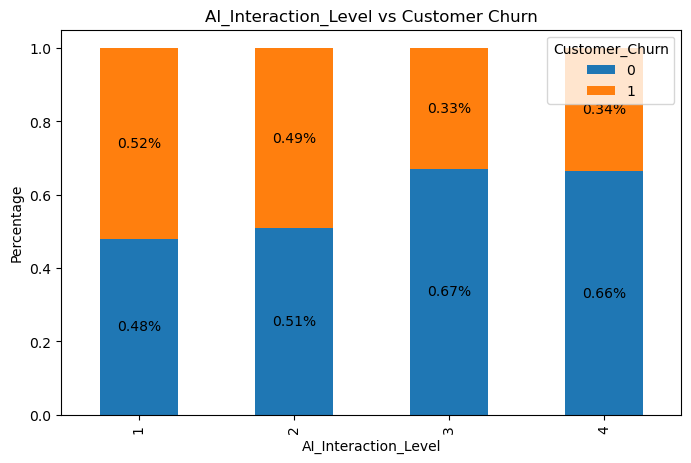

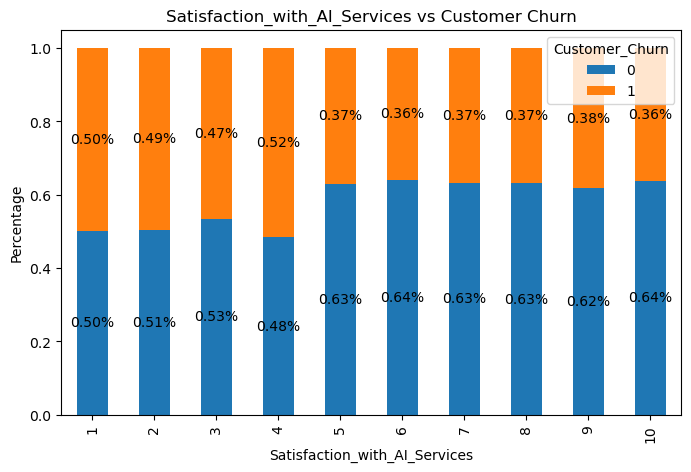

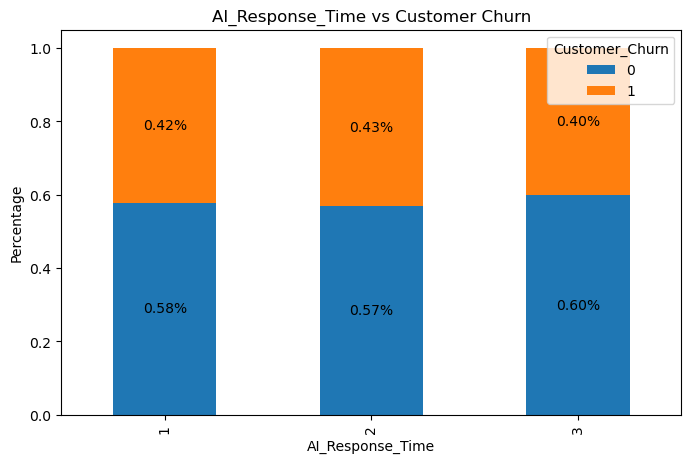

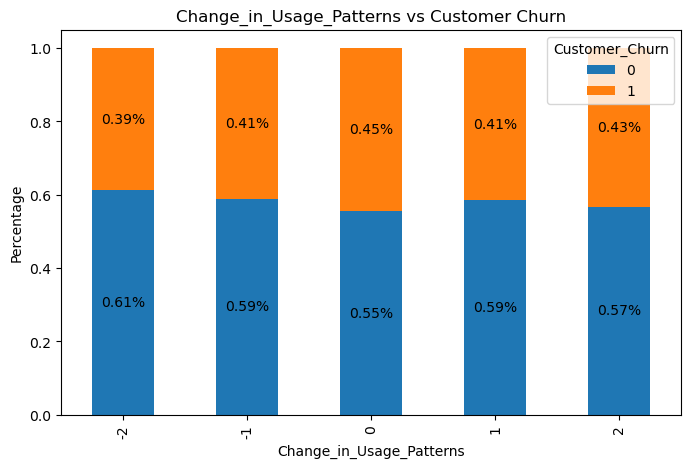

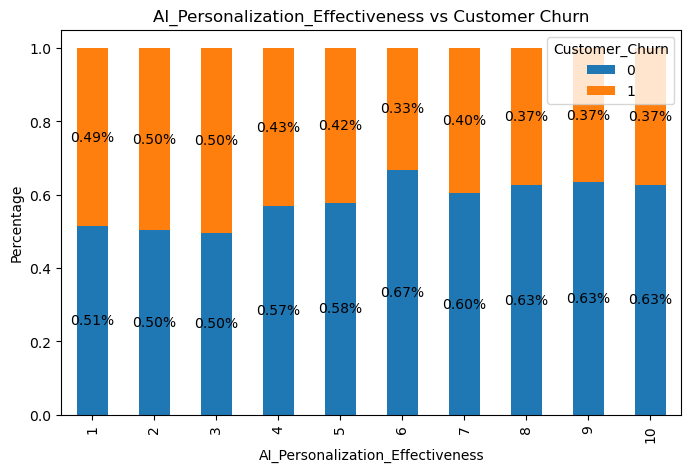

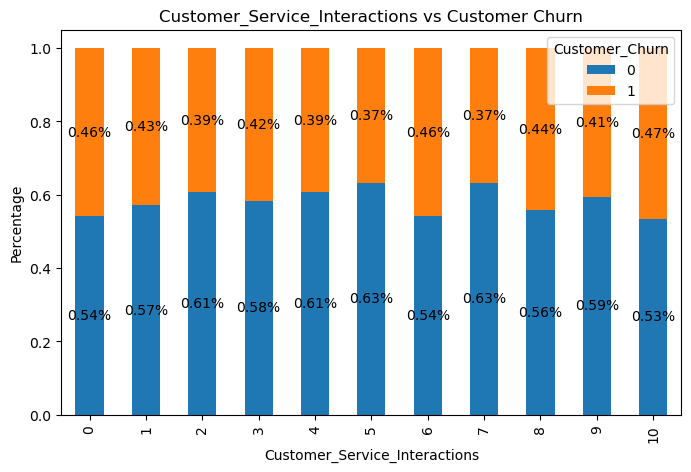

In [15]:
# Convert the 'Customer_Churn' back to a categorical type for visualization
train['Customer_Churn'] = train['Customer_Churn'].astype('category')

# List of ordinal variables
ordinal_vars = ['AI_Interaction_Level', 'Satisfaction_with_AI_Services', 'AI_Response_Time', 
                    'Change_in_Usage_Patterns', 'AI_Personalization_Effectiveness', 'Customer_Service_Interactions']

# Iterate through the list and create a stacked bar chart 
for var in ordinal_vars:
    cross_tab = pd.crosstab(index=train[var], columns=train['Customer_Churn'], normalize='index')
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'{var} vs Customer Churn')
    plt.ylabel('Percentage')
    for c in ax.containers:
        ax.bar_label(c, fmt='%.2f%%', label_type='center')
    plt.show()

#### **Feature Engineering**

Based on the above insights, we will create a few new features and explore certain variables for predicting churn: 

##### Exploring AI Interaction Levels

In [16]:
train_AI_interact_analysis = train.copy()

# Refactoring AI_Interaction_Level into categories
labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
train_AI_interact_analysis['AI_Interaction_Level_Grouped'] = train_AI_interact_analysis['AI_Interaction_Level'].map(labels)

In [17]:
# Creating Interaction Terms
train_AI_interact_analysis['AI_Level_x_Satisfaction'] = train_AI_interact_analysis['AI_Interaction_Level'] * train_AI_interact_analysis['Satisfaction_with_AI_Services']
train_AI_interact_analysis['AI_Level_x_Personalization'] = train_AI_interact_analysis['AI_Interaction_Level'] * train_AI_interact_analysis['AI_Personalization_Effectiveness']

##### Overall AI Service Quality

Our correlation matrix shows Satisfaction with AI Services and AI Personalization Effectiveness are highly correlated with each other, and possess an equally weak positive correlation with the target variable (Customer Churn).

To train and test logistic regression models, we created:
* Overall AI service quality - a weighted sum of Satisfaction with AI Services and AI Personalization Effectiveness

This likely is not a problem for tree-based models like Random Forest models, so we will also reference the **train** dataset that keeps both initially.

In [18]:
# Create new feature by averaging 'Satisfaction_with_AI_Services' and 'AI_Personalization_Effectiveness'
train_feature_1 = train.copy()
train_feature_1['Overall_AI_Service_Quality'] = train_feature_1[['Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness']].mean(axis=1)

# Print the updated DataFrame
# print(train_feature_1)

Similarly as shown by the correlation heatmap and bivariate analysis, 

## **Data Preprocessing**

In [19]:
# Load dependencies
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder

We will apply One-Hot Encoding to categorical variables to process them into a form that is better suited for prediction through machine learning algorithms. We create a binary column for each category in the original data variable and assign binary values accordingly (0, 1).

In [26]:
train_p_raw = train.copy()
test_p_raw = test.copy()

# List of numeric variables
numeric_vars = ['AI_Interaction_Level', 'Age', 'Satisfaction_with_AI_Services',
                'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency',
                'Customer_Service_Interactions', 'Change_in_Usage_Patterns']

# Confirm all numeric variables are of numeric type
train_p_raw[numeric_vars] = train_p_raw[numeric_vars].apply(pd.to_numeric, errors='coerce')
test_p_raw[numeric_vars] = test_p_raw[numeric_vars].apply(pd.to_numeric, errors='coerce')

In [27]:
# Initializing OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

In [28]:
# ON TRAINING DATA
encoded_data = onehot_encoder.fit_transform(train_p_raw[['AI_Response_Time']])
encoded_df = pd.DataFrame(encoded_data,
                          columns=[f"AI_Response_Time_{category}" for category in onehot_encoder.categories_[0]])

# Concatenate the new DataFrame (encoded_df) to the original one (train_p)
train_p = pd.concat([train_p_raw.drop('AI_Response_Time', axis=1).reset_index(drop=True), 
                     encoded_df.reset_index(drop=True)], axis=1)

print(train_p.head())

   ID  Age  AI_Interaction_Level  Satisfaction_with_AI_Services  \
0   1   59                     2                              7   
1   2   49                     2                              6   
2   3   35                     2                              3   
3   4   63                     2                              3   
4   5   28                     4                              6   

   AI_Personalization_Effectiveness  Overall_Usage_Frequency  \
0                                 7                       18   
1                                 5                        3   
2                                 3                        8   
3                                 3                        6   
4                                 6                       11   

   Customer_Service_Interactions  Change_in_Usage_Patterns Customer_Churn  \
0                              5                         2              1   
1                              2                         0

In [30]:
# ON TESTING DATA
encoded_data_test = onehot_encoder.fit_transform(test_p_raw[['AI_Response_Time']])
encoded_df_test = pd.DataFrame(encoded_data_test, 
                               columns=[f"AI_Response_Time_{category}" for category in onehot_encoder.categories_[0]])

# Concatenate the new DataFrame to the original test DataFrame and drop the original 'AI_Response_Time' column
test_p = pd.concat([test.drop('AI_Response_Time', axis=1).reset_index(drop=True), 
                    encoded_df_test.reset_index(drop=True)], axis=1)

#### **Scaling Data**

Since we are looking to try different algorithms for prediction, we will perform standardization and normalization separately on the data to apply to different models accordingly. SVM and Logistic Regression models tend to benefit from standardization, while RNN models benefit more from normalization.

#### **Standardizing the Data**

Result dataframe: train_p_standard

In [31]:
# Initializing the scaler
scaler = StandardScaler()

train_p_standard = train_p.copy()
test_p_standard = test_p.copy()

# Apply standardization

columns_to_standardize = ['AI_Interaction_Level','Age','Satisfaction_with_AI_Services', 
                        'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency', 
                        'Customer_Service_Interactions', 'Change_in_Usage_Patterns']
train_p_standard[columns_to_standardize] = scaler.fit_transform(train_p_standard[columns_to_standardize])
test_p_standard[columns_to_standardize] = scaler.fit_transform(test_p_standard[columns_to_standardize])

In [32]:
print(train_p_standard.head())

   ID       Age  AI_Interaction_Level  Satisfaction_with_AI_Services  \
0   1  1.308417             -0.498321                       0.520010   
1   2  0.511816             -0.498321                       0.170870   
2   3 -0.603425             -0.498321                      -0.876553   
3   4  1.627057             -0.498321                      -0.876553   
4   5 -1.161045              1.627623                       0.170870   

   AI_Personalization_Effectiveness  Overall_Usage_Frequency  \
0                          0.511193                 0.285562   
1                         -0.182326                -1.438151   
2                         -0.875846                -0.863580   
3                         -0.875846                -1.093408   
4                          0.164434                -0.518837   

   Customer_Service_Interactions  Change_in_Usage_Patterns Customer_Churn  \
0                      -0.020830                  1.411071              1   
1                      -0.96

#### **Data Normalization**

Result dataframe: train_p_normal

In [33]:
# Initialize the MinMaxScaler for normalization
scaler = MinMaxScaler()

train_p_normal = train_p.copy()
test_p_normal = test_p.copy()

columns_to_normalize = ['AI_Interaction_Level','Age','Satisfaction_with_AI_Services', 
                        'AI_Personalization_Effectiveness', 'Overall_Usage_Frequency', 
                        'Customer_Service_Interactions', 'Change_in_Usage_Patterns']
train_p_normal[columns_to_normalize] = scaler.fit_transform(train_p_normal[columns_to_normalize])
train_p_normal[columns_to_normalize] = scaler.fit_transform(train_p_normal[columns_to_normalize])

In [34]:
print(train_p_normal.head())

   ID       Age  AI_Interaction_Level  Satisfaction_with_AI_Services  \
0   1  0.883721              0.333333                       0.666667   
1   2  0.651163              0.333333                       0.555556   
2   3  0.325581              0.333333                       0.222222   
3   4  0.976744              0.333333                       0.222222   
4   5  0.162791              1.000000                       0.555556   

   AI_Personalization_Effectiveness  Overall_Usage_Frequency  \
0                          0.666667                 0.586207   
1                          0.444444                 0.068966   
2                          0.222222                 0.241379   
3                          0.222222                 0.172414   
4                          0.555556                 0.344828   

   Customer_Service_Interactions  Change_in_Usage_Patterns Customer_Churn  \
0                            0.5                      1.00              1   
1                           

We do not need to conduct train-test splitting; the training and testing data has already been split.

## **Clustering Analysis**

## **Model Selection**

We establish the predictors and target variables.

#### Resampling Data

Standardized Sets

In [35]:
# Training data (standardized by default)
X_train = train_p_standard.drop(columns=['ID', 'Customer_Churn'])  # Features
y_train = train_p_standard ['Customer_Churn']                      # Target variable

In [36]:
# Testing data (standardized by default)
X_test = test_p_standard.drop(columns=['ID', 'Customer_Churn'])  # Features
y_test = test_p_standard ['Customer_Churn']

Normalized Sets

In [37]:
# Training data (normalized for Neural Networks):
X_train_n = train_p_normal.drop(columns=['ID', 'Customer_Churn'])  # Features
y_train_n = train_p_normal ['Customer_Churn']                      # Target variable

In [38]:
# Testing data (normalized for Neural Networks):
X_test_n = test_p_normal.drop(columns=['ID', 'Customer_Churn'])  # Features
y_test_n = test_p_normal ['Customer_Churn']

In [39]:
# Balance data by resampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train_n, y_train_n = smote.fit_resample(X_train_n, y_train_n)

We ensure our distribution of resampled data is now even. This is especially key for neural network models that rely on a balanced sample.

Counter({1: 2909, 0: 2909})


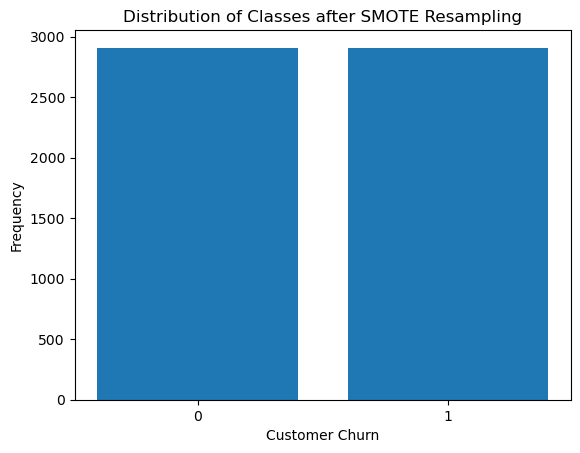

In [40]:
from collections import Counter
import matplotlib.pyplot as plt

# Standardized data
counter = Counter(y_train)
print(counter)

# Visualize the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Customer Churn')
plt.ylabel('Frequency')
plt.title('Distribution of Classes after SMOTE Resampling')
plt.xticks(list(counter.keys())) 
plt.show()

Counter({1: 2909, 0: 2909})


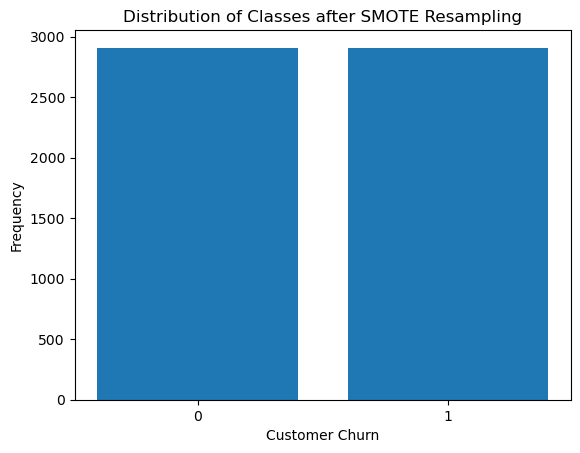

In [41]:
# Normalized data
counter = Counter(y_train_n)
print(counter)

# Visualize the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Customer Churn')
plt.ylabel('Frequency')
plt.title('Distribution of Classes after SMOTE Resampling')
plt.xticks(list(counter.keys())) 
plt.show()

However, we ensure we do NOT apply upsampling to the testing data, namely by examining the distribution of y_test.

Counter({0: 714, 1: 536})


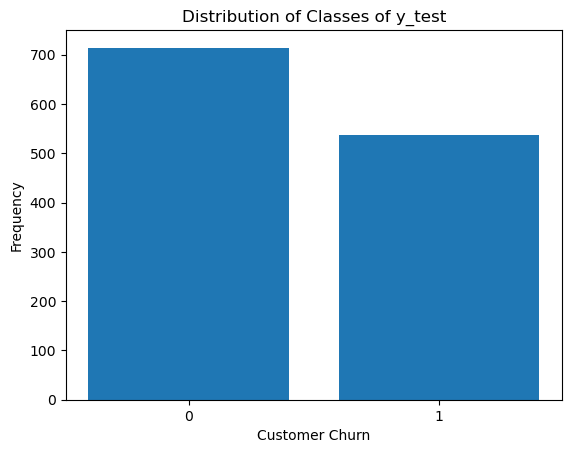

In [42]:
from collections import Counter
import matplotlib.pyplot as plt

# Standardized data
counter = Counter(y_test)
print(counter)

# Visualize the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Customer Churn')
plt.ylabel('Frequency')
plt.title('Distribution of Classes of y_test')
plt.xticks(list(counter.keys())) 
plt.show()

#### **0 | Baseline Model**

We will use **Logistic Regression** as a commonly-implemented model for binary classification to establish baseline performance.

In [43]:
# Load in dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [44]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

**Explaining Model Evaluation**

In [45]:
# Cross-validated metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(logreg, X_train, y_train, cv=5, scoring=scoring)

In [46]:
# Additional metrics
print(f"Average Accuracy: {results['test_accuracy'].mean():.2f} ± {results['test_accuracy'].std():.2f}")
print(f"Average Precision: {results['test_precision'].mean():.2f}")
print(f"Average Recall: {results['test_recall'].mean():.2f}")
print(f"Average F1 Score: {results['test_f1'].mean():.2f}")

Average Accuracy: 0.58 ± 0.01
Average Precision: 0.58
Average Recall: 0.58
Average F1 Score: 0.58


This is moderate, but not great. We will try using other models for binary classification.

In [47]:
coefficients = pd.DataFrame(logreg.coef_[0], X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                  Coefficient
AI_Response_Time_2                   0.061703
Change_in_Usage_Patterns             0.046656
Customer_Service_Interactions        0.004047
AI_Personalization_Effectiveness    -0.001055
AI_Response_Time_1                  -0.007235
Overall_Usage_Frequency             -0.042642
AI_Response_Time_3                  -0.066597
Age                                 -0.085737
Satisfaction_with_AI_Services       -0.232266
AI_Interaction_Level                -0.411545


**Interpreting the coefficients (log odds)**

**Positive Coefficients (Increase Likelihood of Customer Churn):**
* Change in Usage Patterns (0.149665): More significant changes in their usage patterns indicate more likely to churn.

* AI_Response_Time_1 (0.061579): Customers classified under 'AI_Response_Time_1' are more likely to churn compared to the baseline group (this could be 'AI_Response_Time_0'.

* Customer Service Interactions (0.034995): Increased customer service interactions is associated with a slightly higher likelihood of churning.

* AI Personalization Effectiveness (0.011515) and AI_Response_Time_0 (0.010010): These variables also show a positive relationship with customer churn but with a smaller effect size.

**Negative Coefficients (Decrease Likelihood of Customer Churn):**
* AI_Response_Time_2 (-0.072227): Customers in this category are less likely to churn compared to the reference group in 'AI_Response_Time'.

* Overall Usage Frequency (-0.128026): Higher usage frequency is associated with a lower likelihood of churn. 

* Age (-0.237477): Older customers are less likely to churn.

* Satisfaction with AI Services (-0.700986): A higher satisfaction rating with AI services significantly decreases the likelihood of churn. This is one of the **stronger** relationships, with a substantial decrease in the log odds of churning.

* AI Interaction Level (-1.203924): This has the most **substantial negative** effect on customer churn. Higher levels of interaction with AI (assuming higher numerical values correspond to greater interaction) are strongly associated with lower chances of churn. The log odds decrease significantly, indicating that **enhancing AI interaction levels might be an effective strategy for reducing churn.**

#### **1 | Support Vector Model (SVM)**

In [48]:
# Load dependencies
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

**Linear Kernel**

In [49]:
# Setting the kernel
svc = SVC(kernel='linear', random_state=42) 

In [50]:
# Run and calculate metrics for cross-validation sets
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-validated accuracy: 0.59 ± 0.01


**Polynomial Kernel**

In [51]:
# Initialize the SVM model
svc_poly = SVC(random_state=42)

In [52]:
# # Define parameter distributions (or ranges) for the polynomial kernel
# param_distributions_poly = {
#     'C': np.logspace(-2, 10, 20),  # We use logarithmically spaced values as they are often more effective
#     'gamma': np.logspace(-9, 3, 20),  
#     'degree': [2, 3, 4, 5, 6], 
#     'kernel': ['poly']
# }

In [53]:
# # Setting up RandomizedSearchCV
# random_search_poly = RandomizedSearchCV(
#     svc_poly,
#     param_distributions=param_distributions_poly,
#     n_iter=100,  # Number of parameter settings sampled. 
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     verbose=2  # Controls the verbosity: the higher, the more messages.
# )

In [54]:
# # Fit the randomized search model
# random_search_poly.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters (polynomial kernel):", random_search_poly.best_params_)
# print("Best accuracy (polynomial kernel):", random_search_poly.best_score_)

Note: Changing the degree of the polynomial function does not display any significant increase in accuracy.

In [55]:
# Setting degree = 5 for best parameter
svc_poly_final = SVC(kernel='poly', degree=5, random_state=42)

In [56]:
scores_poly_final = cross_val_score(svc_poly_final, X_train, y_train, cv=5, scoring='accuracy')
print(f'Best polynomial kernel accuracy: {scores_poly_final.mean():.2f} ± {scores_poly_final.std():.2f}')

Best polynomial kernel accuracy: 0.60 ± 0.02


**Radial Basis Function (RBF) / Gaussian Kernel**

In [57]:
# Initialize the SVM model
svc_rbf = SVC(random_state=42)

In [58]:
# # Set up parameter grid for RBF kernel
# param_distributions_rbf = {
#     'C': np.logspace(-2, 10, 20),
#     'gamma': np.logspace(-9, 3, 20),
#     'kernel': ['rbf']
# }

In [59]:
# # Setting up RandomizedSearchCV for RBF:
# random_search_rbf = RandomizedSearchCV(
#     svc_rbf,
#     param_distributions=param_distributions_rbf,
#     n_iter=100,  # Adjust based on your computational resources
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     verbose=2
# )

In [60]:
# # Fit the randomized search model
# random_search_rbf.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters (RBF kernel):", random_search_rbf.best_params_)
# print("Best accuracy (RBF kernel):", random_search_rbf.best_score_)

In [61]:
# Setting kernel
svc_rbf_final = SVC(kernel='rbf', random_state=42)

In [62]:
# Run and calculate metrics for cross-validation sets
scores_rbf_final = cross_val_score(svc_rbf_final, X_train, y_train, cv=5, scoring='accuracy')
print(f'RBF kernel accuracy: {scores_rbf_final.mean():.2f} ± {scores_rbf_final.std():.2f}')

RBF kernel accuracy: 0.61 ± 0.01


**Sigmoid Kernel**

In [63]:
# Setting kernel
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)

In [64]:
# Run and calculate metrics for cross-validation sets
scores_sigmoid = cross_val_score(svc_sigmoid, X_train, y_train, cv=5, scoring='accuracy')
print(f'Sigmoid kernel accuracy: {scores_sigmoid.mean():.2f} ± {scores_sigmoid.std():.2f}')

Sigmoid kernel accuracy: 0.51 ± 0.01


The accuracy of the kernels is ordered as follows:
1. Gaussian: 0.61 ± 0.01
2. Polynomial: 0.60 ± 0.02
3. Linear: 0.58 ± 0.00
4. Sigmoid: 0.53 ± 0.01

#### **2 | Random Forest Classification**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [67]:
# y must be an integer in this case for RF to work
X_train_rf = train_p.drop(columns=['ID', 'Customer_Churn'])  
y_train_rf = train_p['Customer_Churn'].astype(int) 

X_test_rf = test_p.drop(columns=['ID', 'Customer_Churn'])  # Features
y_test_rf = test_p ['Customer_Churn']

X_train_rf, y_train_rf = smote.fit_resample(X_train_rf, y_train_rf)

In [68]:
# Training RF classifier
rf = RandomForestClassifier(n_estimators=100,     # Number of trees
                            max_depth=10,         # Depths
                            max_features='sqrt',  # Values
                            min_samples_split=2,  # Minimum number of samples required to split an internal node
                            min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
                            random_state=42)

rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=10, random_state=42)

In [69]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_rf, y_train_rf)

# Output the best parameters and model
print("Best parameters:", grid_search.best_params_)
rf_best = grid_search.best_estimator_

KeyboardInterrupt: 

In [70]:
# Accuracy + addtional scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
results = cross_validate(rf, X_train_rf, y_train_rf, cv=5, scoring=scoring)

print("Cross-validation results:")
for metric_name in scoring:
    metric_values = results[f'test_{metric_name}']
    print(f"{metric_name.capitalize()}: Mean = {metric_values.mean():.3f}, Std = {metric_values.std():.3f}")

Cross-validation results:
Accuracy: Mean = 0.638, Std = 0.056
Precision: Mean = 0.625, Std = 0.030
Recall: Mean = 0.672, Std = 0.164
F1: Mean = 0.641, Std = 0.085


In [71]:
# Feature importances
importances = rf.feature_importances_

# Get the feature names
feature_names = X_train_rf.columns

# Sort the feature importances in descending order and match them with their corresponding feature names
sorted_indices = importances.argsort()[::-1]  # Get indices of sorted importances
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

print("Feature Importances:")
for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

Feature Importances:
Age: 0.1662
Overall_Usage_Frequency: 0.1511
AI_Interaction_Level: 0.1227
Satisfaction_with_AI_Services: 0.1174
Customer_Service_Interactions: 0.1120
AI_Personalization_Effectiveness: 0.0936
Change_in_Usage_Patterns: 0.0749
AI_Response_Time_3: 0.0629
AI_Response_Time_2: 0.0506
AI_Response_Time_1: 0.0486


In [72]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test_rf, y_pred_rf):.2f}')
print(classification_report(y_test_rf, y_pred_rf))

Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       714
           1       0.56      0.62      0.59       536

    accuracy                           0.63      1250
   macro avg       0.62      0.63      0.62      1250
weighted avg       0.63      0.63      0.63      1250



#### **3 | Recurrent Neural Network**

Considerations:
* We train on our **normalized** data instead of our standardized data as our features are not spread out over a Gaussian distribution and our variables are ordinal; they follow strict boundary conditions (no outliers). 

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

2024-03-13 19:45:51.246316: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_n.shape[1],)))  # Specify the input shape 

    # First hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=8, max_value=128, step=16),
                    activation='relu',
                    kernel_regularizer=l2(hp.Float('l2_1', min_value=0.001, max_value=0.1, sampling='log'))))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())

    # Second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=8, max_value=128, step=16),
                    activation='relu',
                    kernel_regularizer=l2(hp.Float('l2_2', min_value=0.001, max_value=0.1, sampling='log'))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())

    # Add more layers if needed

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of different configurations to try
    executions_per_trial=3,  # Number of models to train for each configuration
    directory='my_dir',  # Directory to save logs and models
    project_name='keras_tuning'
)

# Execute the search
tuner.search(X_train_n, y_train_n, epochs=10, validation_split=0.2, verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.45475372672080994

Best val_accuracy So Far: 0.45561283826828003
Total elapsed time: 00h 01m 33s


In [85]:
model = Sequential()

# Input layer
model.add(Input(shape=(X_train_n.shape[1],)))  # Specify the input shape 

# 1st hidden layer with Dropout and Batch Normalization
model.add(Dense(12, activation='relu', kernel_regularizer=l2(0.01)))  # Adding L2 regularization
model.add(Dropout(0.2))          # Adding Dropout
model.add(BatchNormalization())  # Adding Batch Normalization

# 2nd hidden layer 
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())  

# 3rd hidden layer 
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())   

# Output layer 
model.add(Dense(1, activation='sigmoid'))

In [86]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# Fit model
history = model.fit(X_train_n, y_train_n, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5158 - loss: 1.0346 - val_accuracy: 0.2852 - val_loss: 0.9784
Epoch 2/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5557 - loss: 0.8940 - val_accuracy: 0.2174 - val_loss: 0.9391
Epoch 3/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5406 - loss: 0.8511 - val_accuracy: 0.1933 - val_loss: 0.8958
Epoch 4/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5587 - loss: 0.8053 - val_accuracy: 0.1950 - val_loss: 0.8759
Epoch 5/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 0.7738 - val_accuracy: 0.1744 - val_loss: 0.8667
Epoch 6/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 0.7478 - val_accuracy: 0.2113 - val_loss: 0.8441
Epoch 7/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5561 - loss: 0.7327 - val_accuracy: 0.2285 - val_loss: 0.8194
Epoch 8/100
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5753 - loss: 0.7153 - val_accu

In [88]:
_, accuracy = model.evaluate(X_test_n, y_test_n)
print(f'Accuracy: {accuracy:.2f}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5717 - loss: 0.7902 
Accuracy: 0.57


In [89]:
y_pred_nn = model.predict(X_test_n)  # Predict
y_pred_nn = np.round(y_pred_nn)      # Convert probabilities to binary output

print(classification_report(y_test_n, y_pred_nn, zero_division = 0))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       714
           1       0.00      0.00      0.00       536

    accuracy                           0.57      1250
   macro avg       0.29      0.50      0.36      1250
weighted avg       0.33      0.57      0.42      1250



#### **4 | Gradient Boosting**

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# Unstandardized data 
X_train_gb = train_p.drop(columns=['ID', 'Customer_Churn'])  # Features
y_train_gb = train_p ['Customer_Churn']                      # Target variable

X_test_gb = test_p.drop(columns=['ID', 'Customer_Churn'])  # Features
y_test_gb = test_p ['Customer_Churn']

In [91]:
# Initialize the GB classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb.fit(X_train_gb, y_train_gb)

GradientBoostingClassifier(random_state=42)

In [93]:
# Cross Validation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
results = {}  # To store the cross-validation results

for metric in scoring_metrics:
    scores = cross_val_score(gb, X_train_gb, y_train_gb, cv=5, scoring=metric)  # 5-fold cross-validation
    results[metric] = scores
    print(f"{metric.capitalize()} (mean ± std): {scores.mean():.3f} ± {scores.std():.3f}")

Accuracy (mean ± std): 0.603 ± 0.020
Precision (mean ± std): 0.534 ± 0.032
Recall (mean ± std): 0.426 ± 0.012
F1 (mean ± std): 0.473 ± 0.016


In [94]:
# Make predictions on the test set
y_pred_gb = gb.predict(X_test_gb)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test_gb, y_pred_gb):.2f}')
print(classification_report(y_test_gb, y_pred_gb))

Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       714
           1       0.53      0.46      0.50       536

    accuracy                           0.60      1250
   macro avg       0.58      0.58      0.58      1250
weighted avg       0.59      0.60      0.59      1250



In [96]:
# Evaluate features
feature_importance = pd.DataFrame({'Feature': X_train_gb.columns, 'Importance': gb.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                            Feature  Importance
2     Satisfaction_with_AI_Services    0.362800
1              AI_Interaction_Level    0.234769
4           Overall_Usage_Frequency    0.106393
0                               Age    0.094251
5     Customer_Service_Interactions    0.064938
6          Change_in_Usage_Patterns    0.053716
3  AI_Personalization_Effectiveness    0.046224
8                AI_Response_Time_2    0.015937
9                AI_Response_Time_3    0.011532
7                AI_Response_Time_1    0.009440


## **Saving the Prediction Dataframe**

In [ ]:
# Create df with IDs and predictions
predictions_test = pd.DataFrame({
    'ID': test['ID'], 
    'Customer_Churn': y_pred_rf
})

In [ ]:
# Save the DataFrame to a CSV file
predictions_test.to_csv('customer_churn_submission.csv', index=False)